# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [190]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [191]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [192]:
# Load the dataset
df = pd.read_csv("/content/Employee_data.csv");

In [193]:
# Check the first few entries
df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47.0,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93.0,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88.0,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75.0,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,NaN,No,No,Yes,Good,Low,Left


In [194]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [195]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [196]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [197]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [198]:
# Check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

,0
Company Tenure (In Months),2413
Distance from Home,1912
Employee ID,0
Age,0
Job Role,0
Monthly Income,0
Gender,0
Years at Company,0
Job Satisfaction,0
Work-Life Balance,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [199]:
# Check the percentage of missing values in each column
((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

,0
Company Tenure (In Months),3.234151
Distance from Home,2.562659
Employee ID,0.000000
Age,0.000000
Job Role,0.000000
Monthly Income,0.000000
Gender,0.000000
Years at Company,0.000000
Job Satisfaction,0.000000
Work-Life Balance,0.000000


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [200]:
# Handle the missing value rows in the column
# Company Tenure (In Months) , Distance from Home (these two column have missing values)
df["Company Tenure (In Months)"].value_counts()

,count
Company Tenure (In Months),
43.0,971
65.0,960
50.0,950
59.0,945
52.0,945
...,...
123.0,12
125.0,12
126.0,7


In [201]:
len(df["Company Tenure (In Months)"].value_counts())

127

In [202]:
print("Skewness of Distance from Home:", df["Distance from Home"].skew())
print("Skewness of Company Tenure (In Months):", df["Company Tenure (In Months)"].skew())
#  i am taking mean to fill the null values data is not that much skew

Skewness of Distance from Home: 0.001752196934202311
Skewness of Company Tenure (In Months): 0.06610416610811336


In [203]:
df["Distance from Home"].fillna(df["Distance from Home"].mean(), inplace=True)
df["Company Tenure (In Months)"].fillna(df["Company Tenure (In Months)"].mean(), inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [204]:
# Check the percentage of remaining data after missing values are removed
((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

,0
Employee ID,0.0
Age,0.0
Gender,0.0
Years at Company,0.0
Job Role,0.0
Monthly Income,0.0
Work-Life Balance,0.0
Job Satisfaction,0.0
Performance Rating,0.0
Number of Promotions,0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [205]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def redundant_values(x):
    print(f"{x.value_counts()} \n-------------------------")

In [206]:
# Check the data
categorical_df = df.select_dtypes(include=['object'])

categorical_df.apply(redundant_values)

Gender
Male      40898
Female    33712
Name: count, dtype: int64 
-------------------------
Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64 
-------------------------
Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64 
-------------------------
Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64 
-------------------------
Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64 
-------------------------
Overtime
No     50230
Yes    24380
Name: count, dtype: int64 
-------------------------
Education Level
Bachelorâ€™s Degree    22365
Associate Degree       18678
Masterâ€™s Degree      15044
High School            14701
PhD                     3822
Name: count, dtype: int64 
-------------

,0
Gender,None
Job Role,None
Work-Life Balance,None
Job Satisfaction,None
Performance Rating,None
Overtime,None
Education Level,None
Marital Status,None
Job Level,None
Company Size,None


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [207]:
# Drop redundant columns which are not required for modelling
df2 = df.drop(columns=["Leadership Opportunities", "Innovation Opportunities","Employee ID","Company Tenure (In Months)"])

In [208]:
# Check first few rows of data
df2.head(2)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,No,Fair,Low,Stayed


In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   74610 non-null  int64  
 1   Gender                74610 non-null  object 
 2   Years at Company      74610 non-null  int64  
 3   Job Role              74610 non-null  object 
 4   Monthly Income        74610 non-null  int64  
 5   Work-Life Balance     74610 non-null  object 
 6   Job Satisfaction      74610 non-null  object 
 7   Performance Rating    74610 non-null  object 
 8   Number of Promotions  74610 non-null  int64  
 9   Overtime              74610 non-null  object 
 10  Distance from Home    74610 non-null  float64
 11  Education Level       74610 non-null  object 
 12  Marital Status        74610 non-null  object 
 13  Number of Dependents  74610 non-null  int64  
 14  Job Level             74610 non-null  object 
 15  Company Size       

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [210]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [211]:
# Put all the feature variables in X
X = df2.drop(columns=["Attrition"])
# Put the target variable in y
y = df2["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [212]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [213]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52227, 19)
(52227,)
(22383, 19)
(22383,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [214]:
# Select numerical columns
train_num = X_train.select_dtypes(include=['int64','float64'])
print(train_num.columns)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

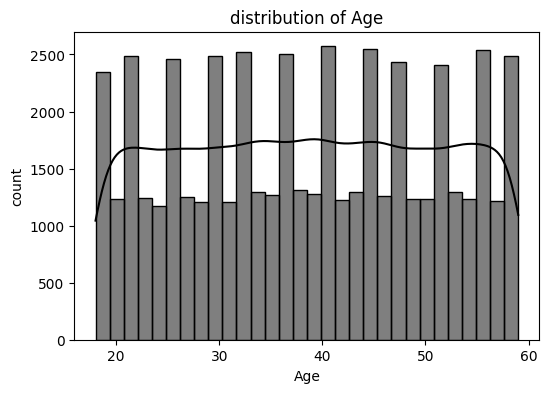

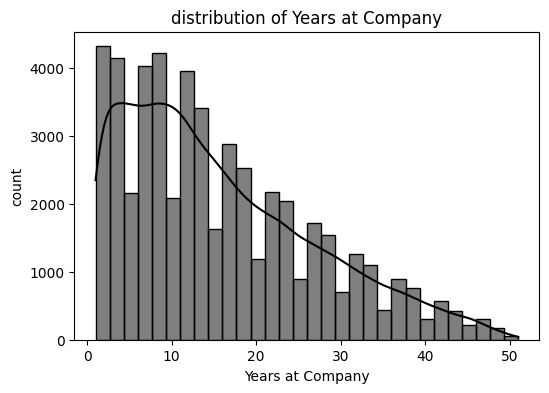

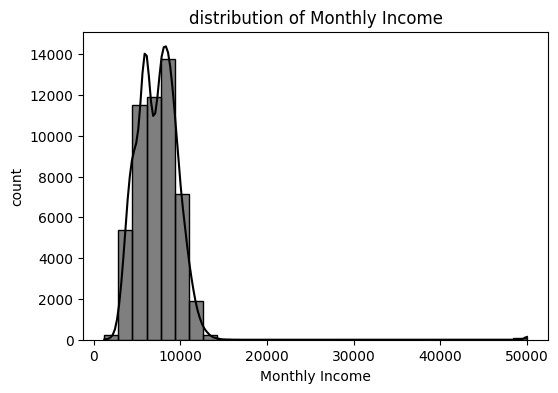

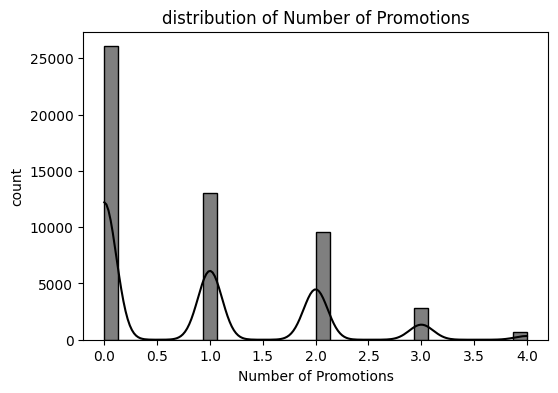

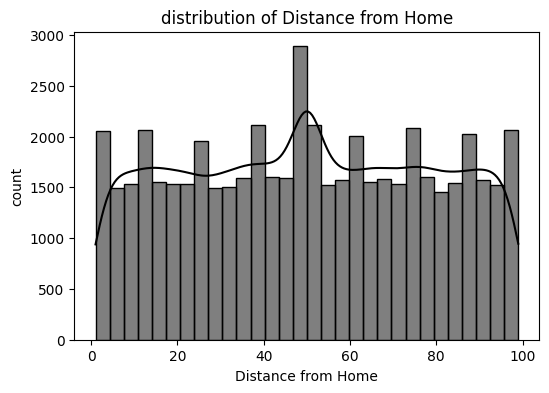

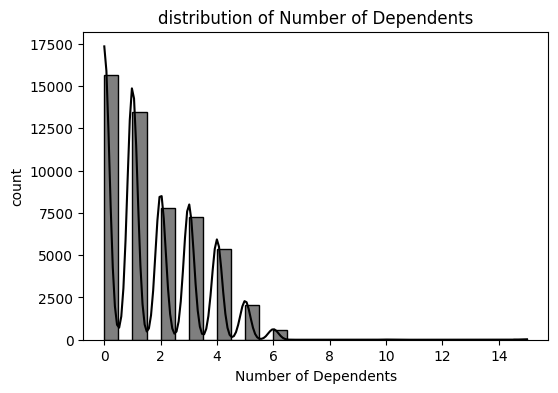

In [215]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# train_num.hist(bins=30, figsize=(15, 12), edgecolor='black')
# plt.suptitle("distribution of numerical features".title(), fontsize=16)
# plt.show()

for col in train_num.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True, bins=30, color="black")
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [216]:
# for i in train_num.columns:
#   print(i, X_train[i].skew())

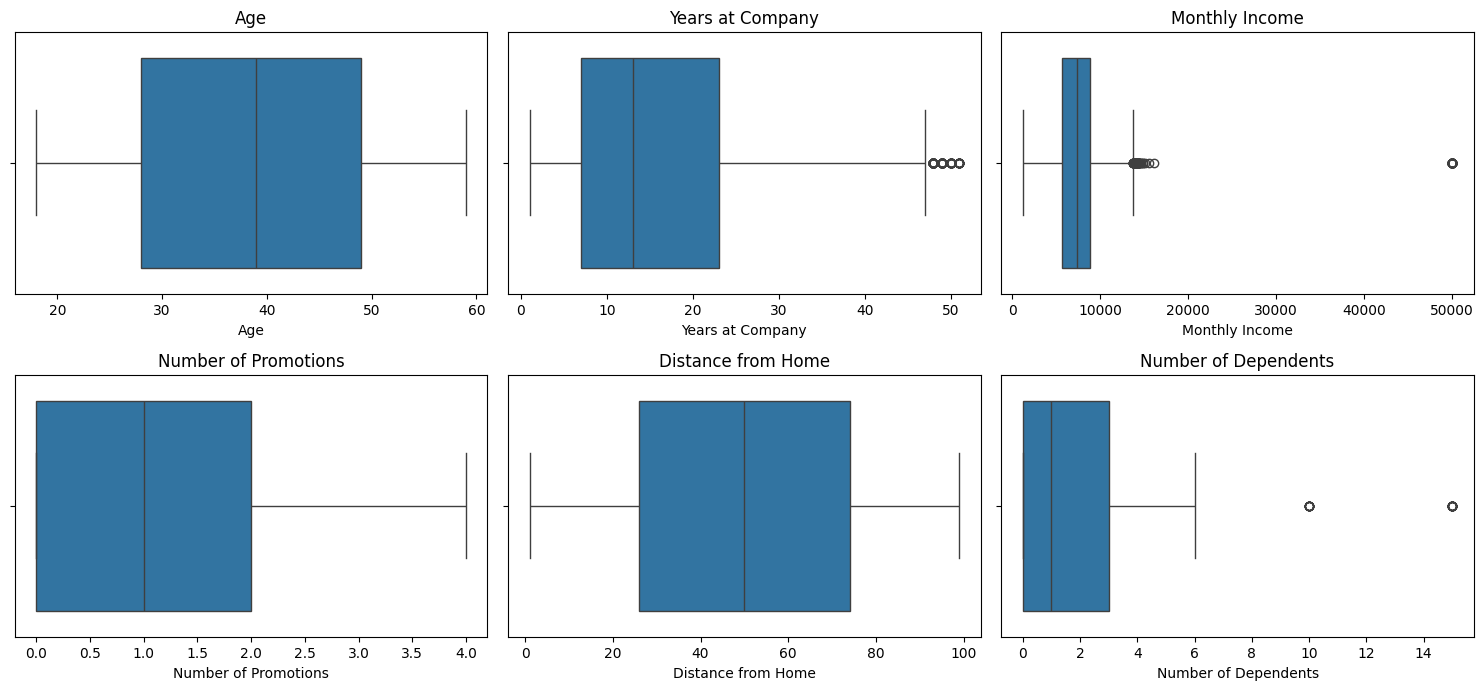

In [217]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(train_num.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train_num[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

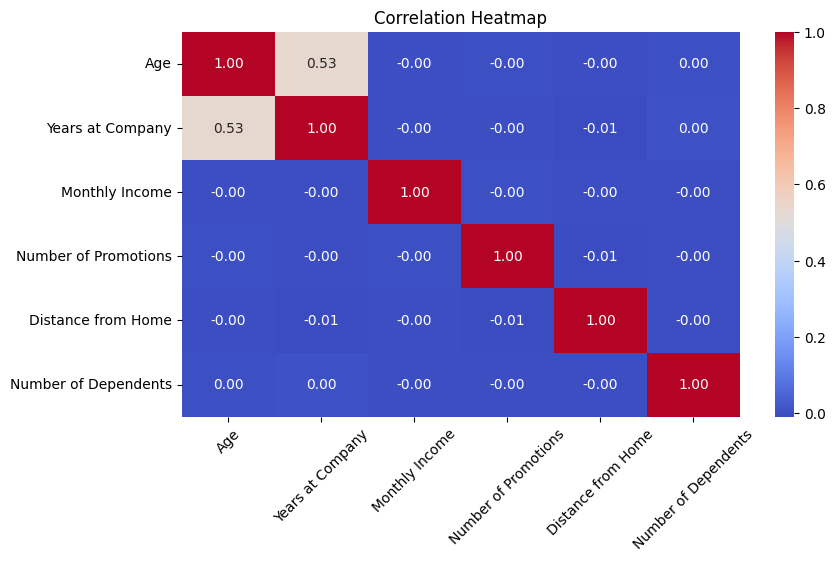

In [218]:
# Create correlation matrix for numerical columns
corr_matrix = train_num.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(9,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap".title())
plt.xticks(rotation=45)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

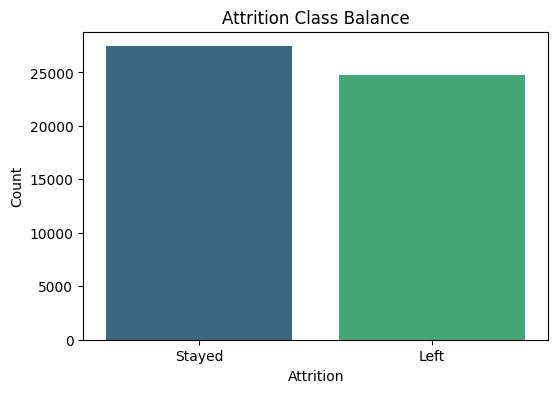

In [219]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=y_train.reset_index(), palette="viridis")

plt.title("Attrition class balance".title())
plt.xlabel("attrition".title())
plt.ylabel("count".title())
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [220]:
# Plot distribution for each categorical column with target variable
train_cat = X_train.select_dtypes(include=['object'])
train_cat.columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

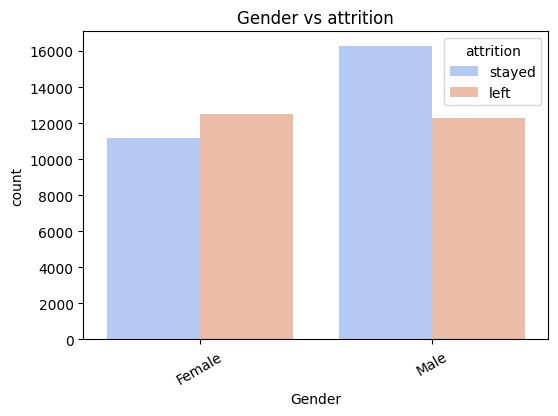

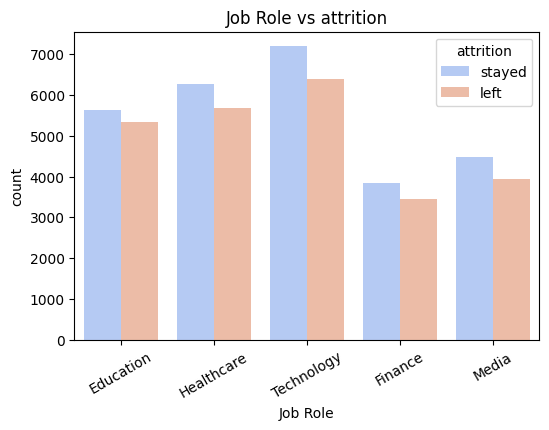

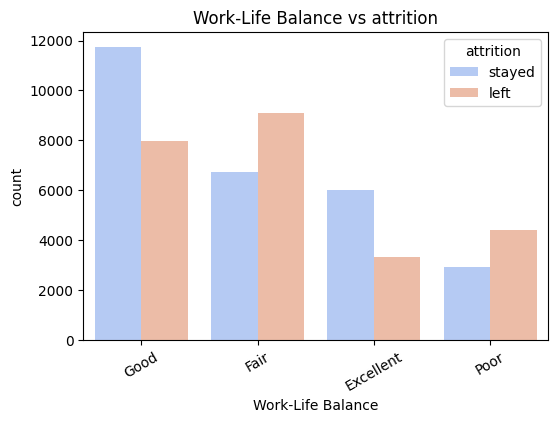

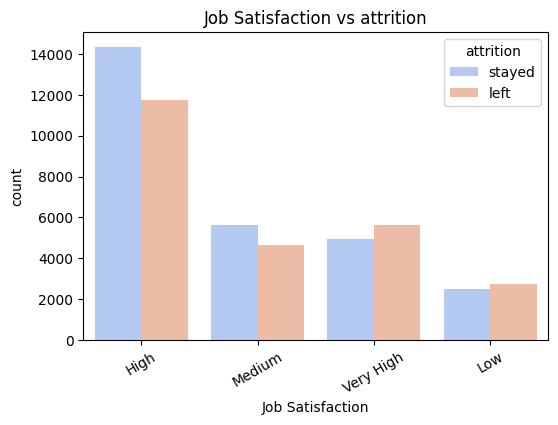

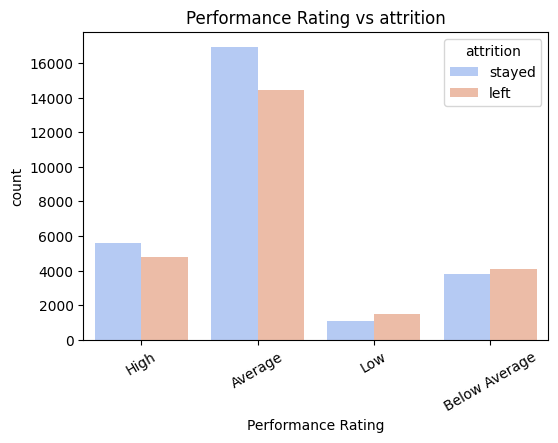

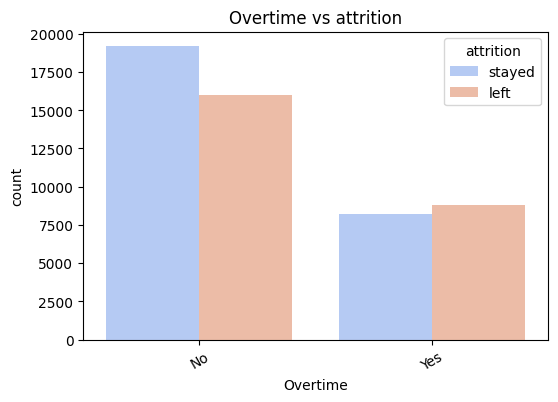

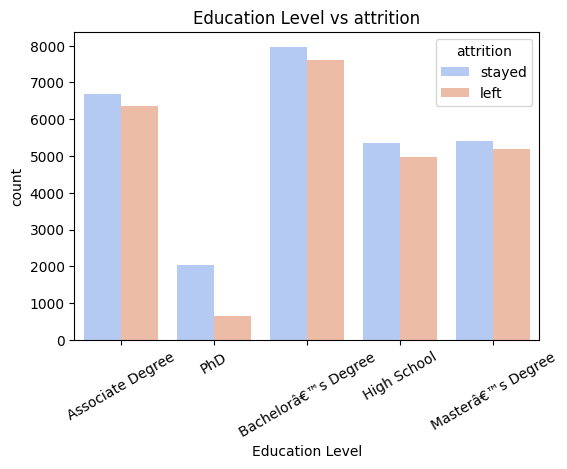

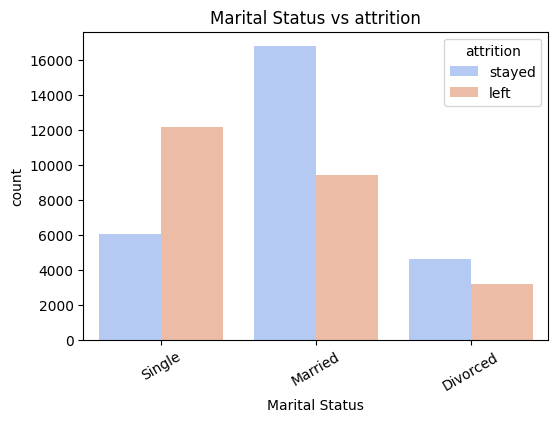

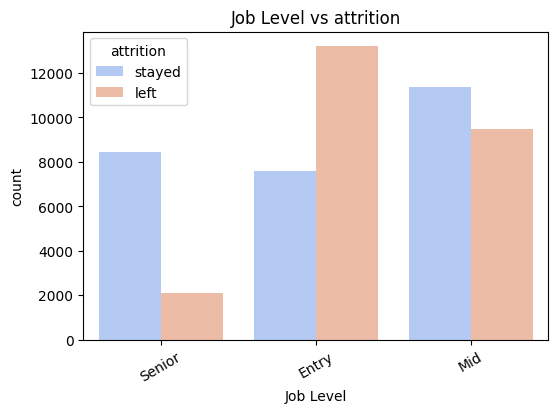

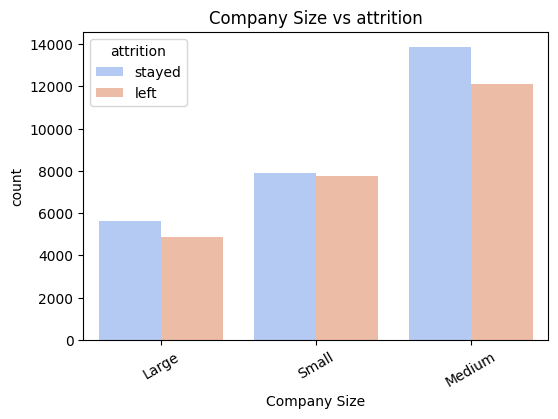

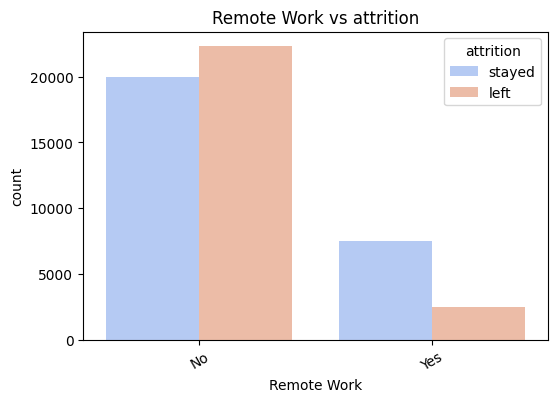

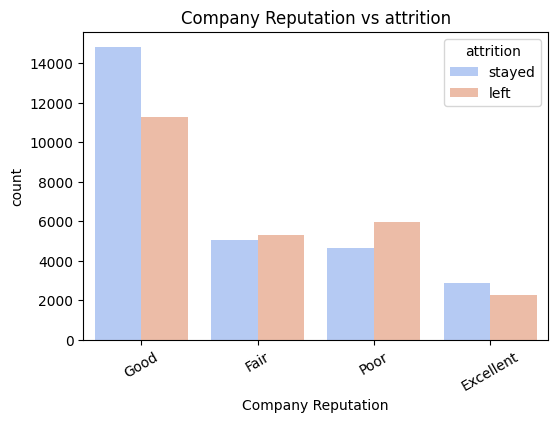

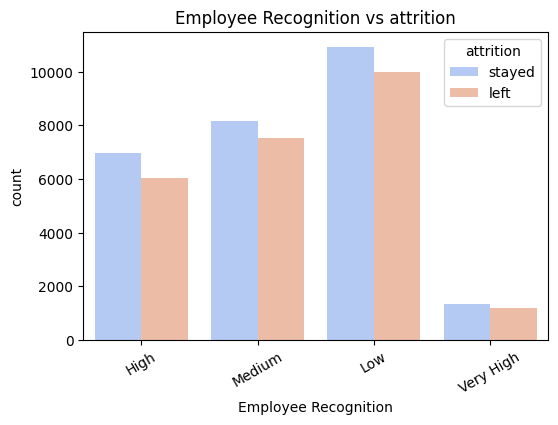

In [221]:
for i in train_cat:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i, hue=y_train, data=X_train, palette="coolwarm")
    plt.title(f"{i} vs attrition")
    plt.xticks(rotation=30)
    plt.ylabel("count")
    plt.legend(title="attrition", labels=["stayed", "left"])
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [222]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [223]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [224]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [225]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [226]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [227]:
# Check the categorical columns
train_cat.columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [228]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummy = pd.get_dummies(X_train[train_cat.columns], drop_first=True).astype(int)
# Add the results to the master DataFrame
X_train.drop(X_train[train_cat.columns],axis = 1,inplace=True)

In [229]:
# X_train.info()

In [230]:
# X_train_dummy.info()

In [231]:
X_train_final = pd.concat([X_train, X_train_dummy], axis=1)
# X_train_final.info()

Now, drop the original categorical columns and check the DataFrame

In [232]:
# Drop the original categorical columns and check the DataFrame
X_train_final.head(2)

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
20940,25,1,4207,2,6.0,5,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17495,26,13,9601,0,14.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [233]:
# Create dummy variables using the 'get_dummies' for independent columns
test_cat = X_test.select_dtypes(include=['object'])
X_test_dummy = pd.get_dummies(X_test[test_cat.columns], drop_first=True).astype(int)
# Add the results to the master DataFrame
X_test_final = pd.concat([X_test, X_test_dummy], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [234]:
# Drop categorical columns and check the DataFrame
X_test_final.drop(X_test_final[test_cat.columns],axis = 1,inplace=True)

In [235]:
# X_test_final.info()

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [236]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train, columns=['Attrition'])
y_test = pd.DataFrame(y_test, columns=['Attrition'])

print(y_train.value_counts())
print(y_test.value_counts())

Attrition
Stayed       27434
Left         24793
Name: count, dtype: int64
Attrition
Stayed       11757
Left         10626
Name: count, dtype: int64


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [237]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_final = pd.get_dummies(y_train['Attrition'], drop_first=True).astype(int)

In [238]:
y_train_final.head(2)

,Stayed
20940,1
17495,0


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [239]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test_final = pd.get_dummies(y_test['Attrition']).astype(int)

In [240]:
y_test_final.head(2)

,Left,Stayed
61298,1,0
46813,0,1


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [241]:
# Drop redundant columns from both train and validation
y_test_final.drop(['Left'],axis=1,inplace=True)
y_test_final.head(2)

,Stayed
61298,0
46813,1


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [242]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [249]:
# Scale the numeric features present in the training set
scaler = StandardScaler()

X_train_final[train_num.columns] = scaler.fit_transform(X_train_final[train_num.columns])


# Scale the numerical features present in the validation set
X_test_final[train_num.columns] = scaler.transform(X_test_final[train_num.columns])

In [256]:
# X_test_final.describe()
# X_train_final.describe()
# X_test_final.head(10)

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
count,5.222700e+04,5.222700e+04,5.222700e+04,5.222700e+04,5.222700e+04,5.222700e+04,52227.000000,52227.000000,52227.000000,52227.000000,...,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000,52227.000000
mean,2.829818e-17,7.754789e-17,-1.184986e-16,2.884237e-17,3.346804e-17,2.829818e-17,0.546403,0.139698,0.228885,0.161487,...,0.202118,0.498191,0.300573,0.190572,0.197963,0.499569,0.203573,0.400885,0.300917,0.048978
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.497847,0.346677,0.420119,0.367983,...,0.401583,0.500002,0.458511,0.392756,0.398468,0.500005,0.402659,0.490082,0.458661,0.215825
min,-1.708436e+00,-1.308255e+00,-2.348503e+00,-8.362551e-01,-1.743880e+00,-1.047331e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.786142e-01,-7.745725e-01,-6.491054e-01,-8.362551e-01,-8.554620e-01,-1.047331e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.418940e-02,-2.408898e-01,3.564451e-03,1.665483e-01,-2.906166e-03,-4.146220e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.640109e-01,6.485816e-01,5.860177e-01,1.169352e+00,8.503008e-01,8.507959e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.693832e+00,3.139101e+00,1.637748e+01,3.174959e+00,1.738719e+00,8.443303e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables


In [ ]:
# Display the features selected by RFE


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE


In [ ]:
# View the training data


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# Fit a logistic regression model on X_train after adding a constant and output the summary


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF DataFrame for all the variables present


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:
# Create confusion matrix


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity


In [ ]:
# Calculate specificity

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
# Calculate precision


In [ ]:
# Calculate recall


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function


In [ ]:
# Call the ROC function


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs


In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity


In [ ]:
# Calculate Specificity


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Precision


In [ ]:
# Calculate Recall


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [ ]:
# Plot precision-recall curve


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

# View predictions


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'

# Convert 'y_validation' to DataFrame 'actual'

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

# Check the DataFrame


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix


In [ ]:
# Create variables for true positive, true negative, false positive and false negative


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity


In [ ]:
# Calculate specificity


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision


In [ ]:
# Calculate recall


## Conclusion

